# **Solução Tarefa 06 - Identificando padrões (rede perceptron)**

## **Alunos: Yago Matheus da Silva Veloso e Paulo Roberto Santana dos Reis**

## **Carregando bibliotecas** 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## **Carregando banco de dados e tratando as imagens**

In [2]:
# Monta o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dados = '/content/drive/MyDrive/Colab Notebooks/Padrões_RNA'

### Executando a leitura das imagens e carregando os pixels em um banco de dados

In [86]:
%%time
X = []
y = []
pixels_ = []

from PIL import Image # PIL é a biblioteca do python que fornece os recursos de edição de imagens no python

for k in range(0,10):
    k =  str(k)
    for j in range(1,53):
      if j<10:
        j='0' + str(j)
      else:
        j = str(j)
      for i in range(1,4):
        i = str(i)
        
        # Leitura da imagem
        comando= "Image.open('" + dados + "/" + k + "_" + j + "_" + i + ".png').convert('L')"  # executa a busca pela imagens dentro do banco de dados
        img=eval(comando) # Comando eval() executa o código python, neste caso código "comando"
        
        # Convertendo imagem em array
        pixels = np.array(img)
        pixels[pixels > 180] = 255

        # Retirando excesso de bordas horizontais
        tonalidade=240
        nz = (pixels > tonalidade).sum(1)
        q = pixels[nz != pixels.shape[1], :]

        # Retirando excesso de bordas verticais
        nz = (q > tonalidade).sum(0)
        q = q[:, nz != q.shape[0]]

        # Transformando matriz em uma imagem após processamento
        img = Image.fromarray(pixels)

        # Redimensionamento da imagem
        altura=28
        largura=28
        newsize = (altura, largura) 
        img = img.resize(newsize)

        #Transformando imagem em preto e branco
        pixels = np.array(img)
        pixels=(pixels < 230).astype(int)

        #Vetorizando os pixels
        #pixels = np.array(pixels.flatten())

        #Formando o banco de dados
        X.append(pixels)
        y.append(k)
        pixels_.append(pixels)


CPU times: user 1.19 s, sys: 244 ms, total: 1.43 s
Wall time: 3.04 s


In [87]:
# Transformando uma matriz 3D em 2D
X = np.array(X)
X = X.reshape(1560,-1)
np.shape(X)

(1560, 784)

In [88]:
from sklearn.preprocessing import OneHotEncoder
y = np.array(y)
y = y.reshape(-1,1)
encoder = OneHotEncoder(handle_unknown = 'ignore')
y_ =(encoder.fit_transform(y)).toarray()
print(y_)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [89]:
np.shape(y_)

(1560, 10)

In [90]:
zero_class_x = X[0:155]
zero_class_y = y_[0:155]

### Testando a visualização de números do banco de dados

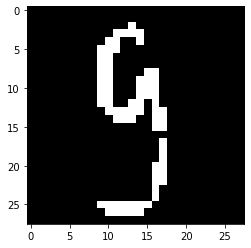

In [91]:
%matplotlib inline
plt.imshow(pixels, cmap='gray')
plt.show()

### Dividindo o banco de dados para teste e treino

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.1, random_state = 42, shuffle = True)

Alguns detalhes sobre a função train_test_split:

*   A função *random_state*, controla a randomização dos dados antes de realizar a divisão. Se o valor da função *random_state* for None (default), todas as vezes que for realizado a execução do algoritmo ele irá gerar um novo banco organizado aleatoriamente. Desta forma o programador irá encontrar um resultado diferente para o memso modelo todas as vezes que executar o algoritmo. Se *random_state* for igual a um valor interio **(popularmente 0 ou 42)**, o algoritmo irá gerar um mesmo resultado de aleatorização a cada execução, sendo assim o modelo que utilizar os dados sempre irá gerar o mesmo resultado.
*   A função *shuffle*, controla se o algoritmo deve ou não embaralhar os dados antes de dividir. Por *default*, essa função é igual a ***True***.



In [93]:
np.shape(X_train)

(1404, 784)

In [94]:
np.shape(y_train)

(1404, 10)

In [95]:
y_train[1403]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

## **Construção e treinamento do modelo Perceptron para identificação de dígitos**

### Carregando os pesos do perceptron

In [118]:
# Definindo a taxa de aprendizagem
taxa_ap = 0.001

# Gerando o valor do peso w0 e x0
w0 = pesos_entr = np.random.rand(1)
x0 = 1
# Gerando valores dos pesos dos neurônios de entrada/ camada intermediária
pesos_entr = np.random.rand(784)

# Gerando valores dos pesos dos neurônios de entrada/ camada intermediária
#pesos_saida = np.random.rand(10)

In [ ]:
pesos_entr

In [130]:
sum(pesos_entr)

374.9826665980863

In [129]:
w0

array([37.60636651])

### Construção do modelo perceptron e treinamento

In [121]:
from math import exp
import random

a = np.zeros(10)
erro = np.zeros(10)
conta_epoch = 0
erro_total = 100
padrao = 0
u = np.zeros(10)
y_pred = np.zeros(10)
 
while (erro_total != 0 and conta_epoch < 500):
  dff = random.sample(range(len(X_train)), (len(X_train)))
  for i in range(len(dff)):
    entrada = X_train[dff[i]]
    saida_desejada = y_train[dff[i]]
    for l in range(0,10):
      a[l] = sum(pesos_entr*entrada)

    u[l]= a[l] + (x0*w0)

    if u[l] < 0:
      y_pred[l] = 1 - (1/(1 + (exp(u[l]))))
    else:
      y_pred[l] = 1/(1 + (exp(-u[l])))

    erro[l] = y_pred[l]- saida_desejada[l]

    if y_pred[l] == saida_desejada[l]:
      padrao = padrao + 1

    for j in range(0,10):  
      if (y_pred[j] != saida_desejada[j]) and (y_pred[j] == 0):
        pesos_entr = pesos_entr + (entrada*taxa_ap)
        w0 = w0 + x0
      if (y_pred[j] != saida_desejada[j]) and (y_pred[j] == 1):
        pesos_entr = pesos_entr - (entrada*taxa_ap)
        w0 = w0 - x0
    
    padrao = padrao + 1

    erro_verdadeiro = sum(erro)
  conta_epoch += 1
  erro_total = sum(erro)
  print ("Número de Epochs", conta_epoch)

print("Número de EPOCHS total do treinamento:", conta_epoch)
print("Número de padrões TOTAL:", padrao)
print("Erro:", erro_total)

Número de Epochs 1
Número de Epochs 2
Número de Epochs 3
Número de Epochs 4
Número de EPOCHS total do treinamento: 4
Número de padrões TOTAL: 6170
Erro: 0.0


In [122]:
u

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 92.41535295])

In [123]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [124]:
saida_desejada

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

### Teste do modelo

In [125]:
y_test = encoder.inverse_transform(y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:582: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, accept_sparse="csr")


ValueError: ignored

In [126]:
a = np.zeros(10)
u = np.zeros(10)
y_ = np.zeros(10)
#y_pred = np.zeros(1403)
y_pred = []
for i in range(0,156):
  for l in range(0,10):
    a[l] = sum(pesos_entr*X_test[i])
  u[l] = a[l] + (w0*x0)

  if u[l] < 0:
    y_[l] = 1 - (1/(1 + (exp(u[l]))))
  else:
    y_[l] = 1/(1 + (exp(-u[l])))
  
  y= np.concatenate([y_], axis=0)
  y_pred.append(y)

In [127]:
y_pred = encoder.inverse_transform(y_pred)

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("A acurácia do modelo foi de:  {:.2f}".format(accuracy_score(y_test, y_pred)))
#print("O recall do modelo foi de:  {:.2f}".format(recall_score(y_test, y_pred)))
#print("A precisão do modelo foi de:  {:.2f}".format(precision_score(y_test, y_pred)))

[[ 0  0  0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0  0  0 18]
 [ 0  0  0  0  0  0  0  0  0 14]
 [ 0  0  0  0  0  0  0  0  0 19]
 [ 0  0  0  0  0  0  0  0  0 17]
 [ 0  0  0  0  0  0  0  0  0 15]
 [ 0  0  0  0  0  0  0  0  0 13]
 [ 0  0  0  0  0  0  0  0  0 15]
 [ 0  0  0  0  0  0  0  0  0 12]
 [ 0  0  0  0  0  0  0  0  0 17]]
A acurácia do modelo foi de:  0.11
